In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from astropy.table import Table
from galpy.util.multi import parallel_map
from galpy.df import quasiisothermaldf
from galpy.potential import MWPotential2014
from galpy.actionAngle import actionAngleStaeckel

# Set up QDF object
aA = actionAngleStaeckel(pot=MWPotential2014, c=True, delta=0.45)
qdf = quasiisothermaldf(1./3., 0.15, 0.075, 1., 1., pot=MWPotential2014, aA=aA, cutcounter=True)

In [2]:
def pz(z):
    result = integrate.quad(lambda R: qdf.density(R, z), 3/8., 13/8., epsabs=0.0001, epsrel=0.0001)
    print('Completed integration at z =', z)
    return result[0]

def pR(R):
    result = integrate.quad(lambda z: qdf.density(R, z), -0.25, 0.25, epsabs=0.0001, epsrel=0.0001)
    print('Completed integration at R =', R)
    return result[0]

def pvT(vT):
    result = integrate.dblquad(lambda z, R: qdf.pvT(vT, R, z), 3./8., 13./8., 
                               lambda R: -0.25, lambda R: 0.25, epsabs=0.0001, epsrel=0.0001)
    print("Completed integration at vT =", vT)
    return result[0]

R = np.linspace(3./8., 13./8., 100)
z = np.linspace(-0.25, 0.25, 100)
vT = np.linspace(0, 1.5, 100)
pRs = parallel_map(pR, R, numcores=50)
pzs = parallel_map(pz, z, numcores=50)
pvTs = parallel_map(pvT, vT, numcores=50)

Completed integration at R = 1.5871212121212122
Completed integration at R = 1.6123737373737375
Completed integration at R = 1.5618686868686869
Completed integration at R = 1.4608585858585859
Completed integration at R = 1.5113636363636362
Completed integration at R = 1.5366161616161615
Completed integration at R = 1.4861111111111112
Completed integration at R = 1.3851010101010102
Completed integration at R = 1.2588383838383839
Completed integration at R = 1.4356060606060606
Completed integration at R = 0.9305555555555556
Completed integration at R = 1.3345959595959596
Completed integration at R = 1.3598484848484849
Completed integration at R = 1.2840909090909092
Completed integration at R = 1.4103535353535352
Completed integration at R = 1.2083333333333335
Completed integration at R = 0.9810606060606061
Completed integration at R = 1.1325757575757576
Completed integration at R = 1.1073232323232323
Completed integration at R = 1.183080808080808
Completed integration at R = 1.2335858585

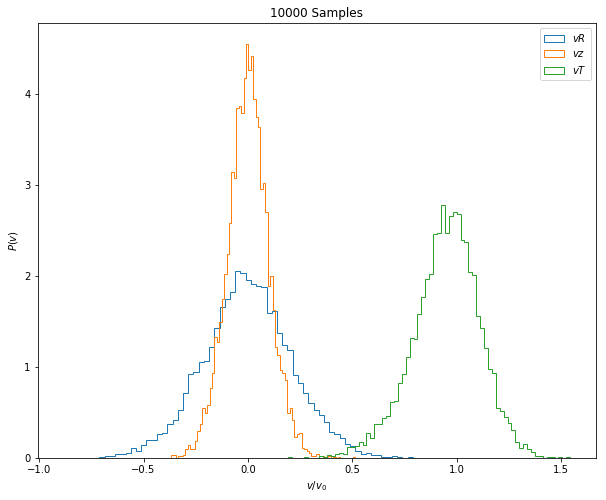

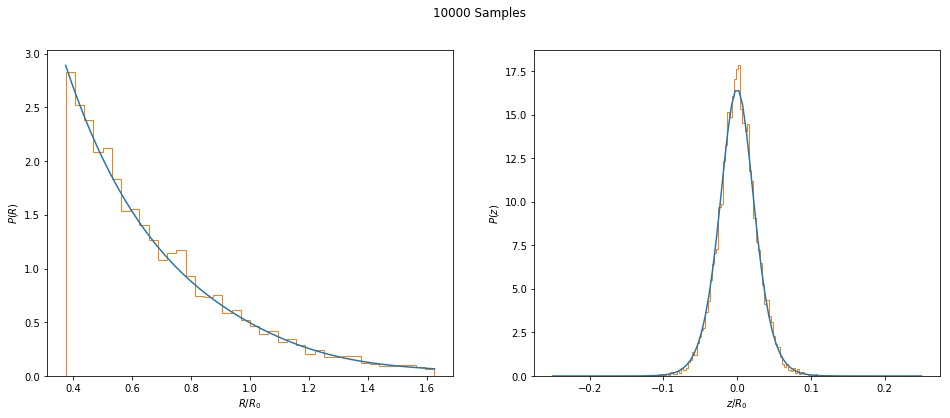

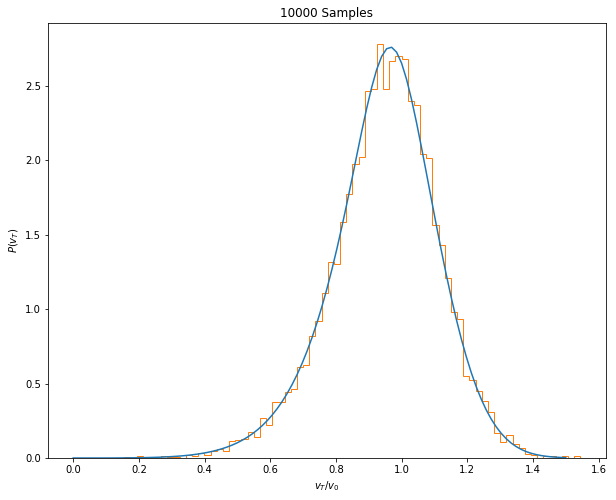

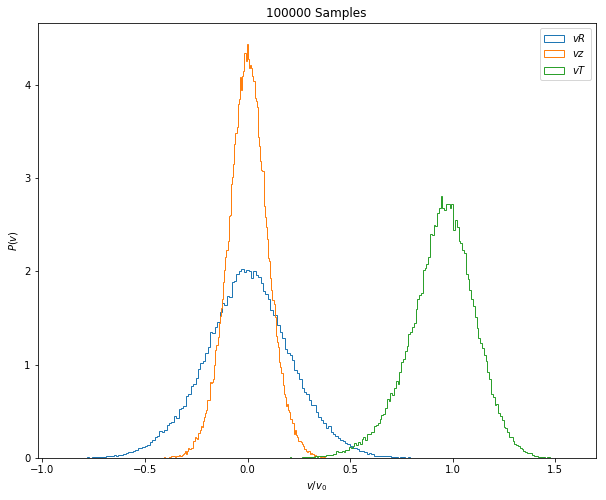

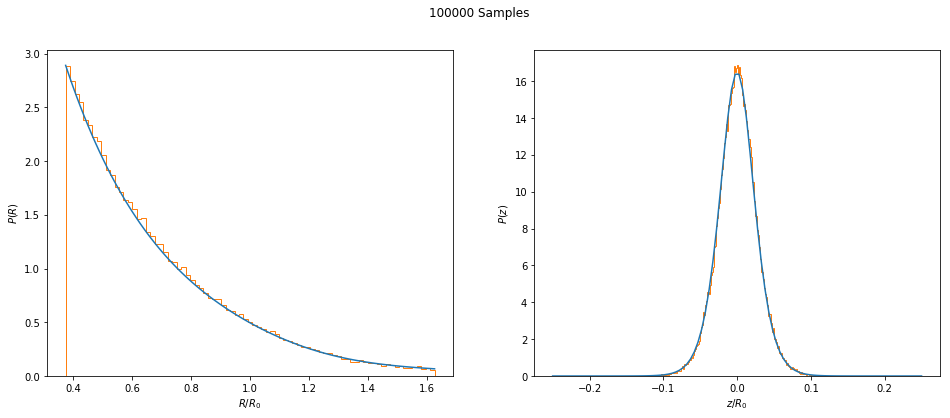

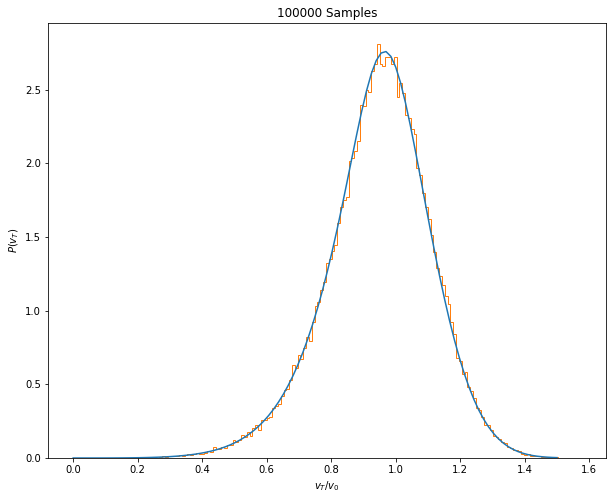

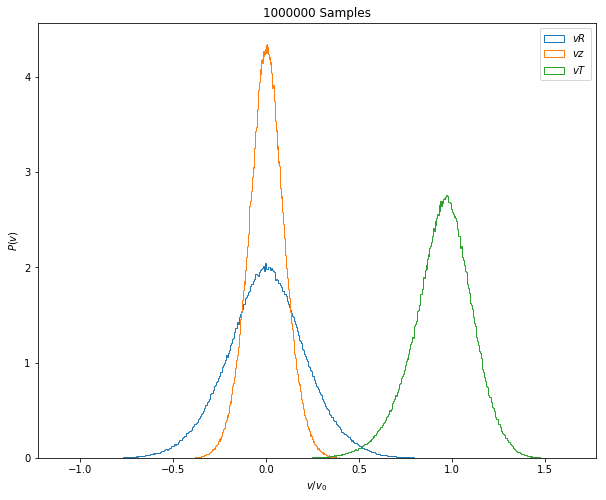

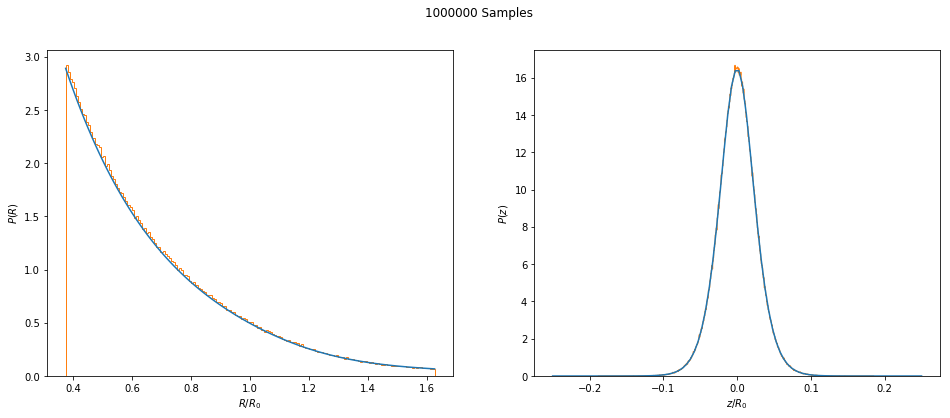

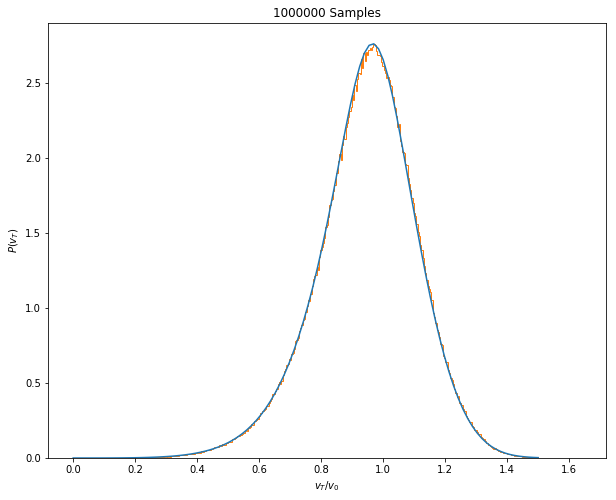

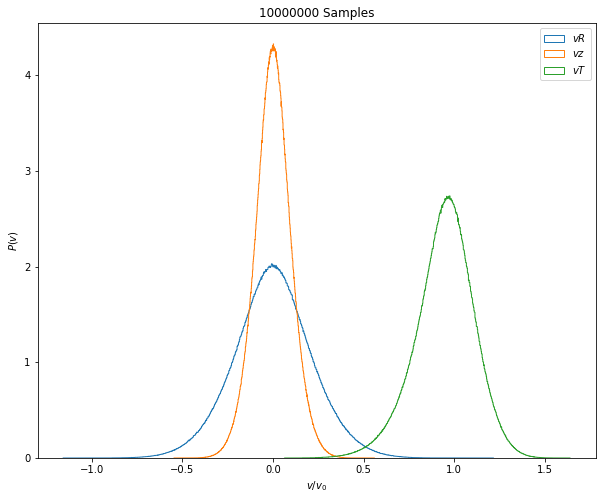

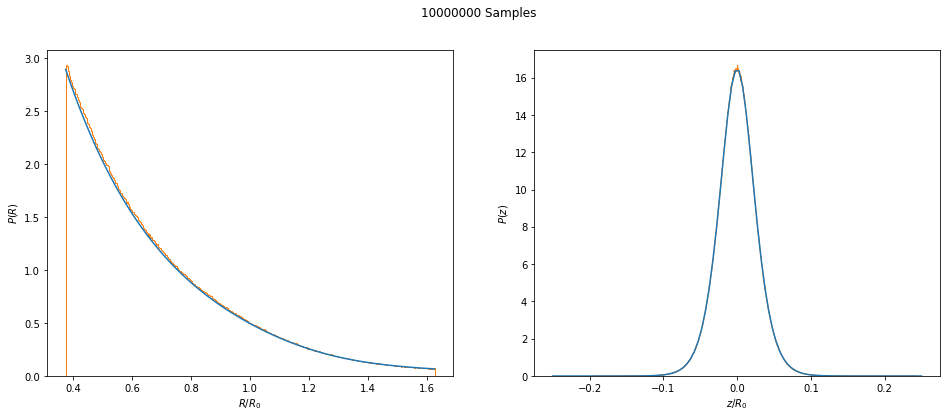

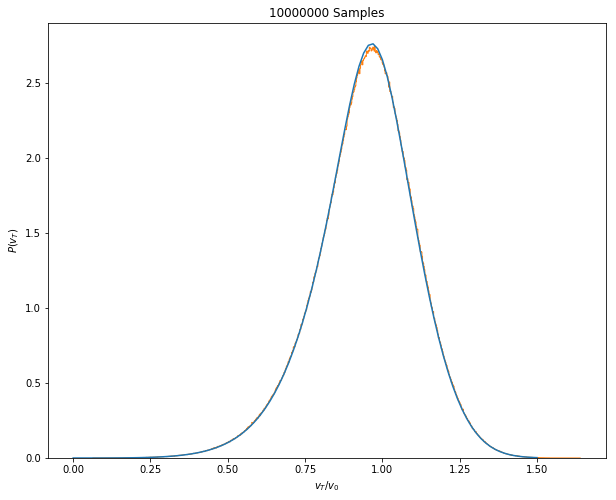

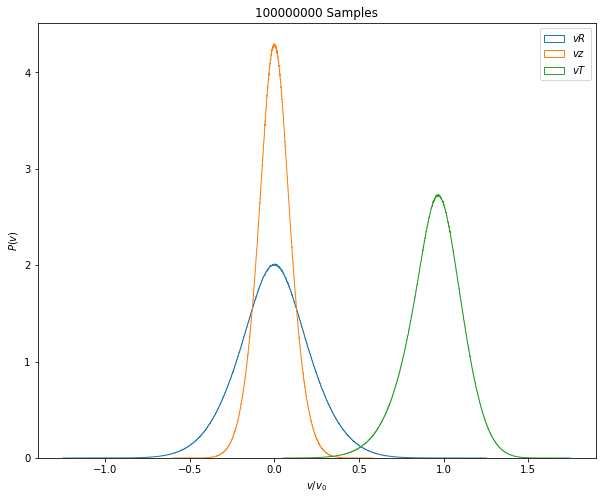

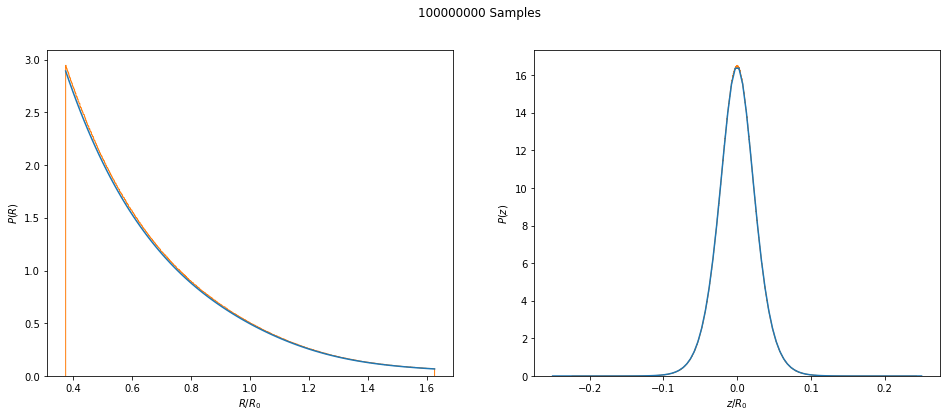

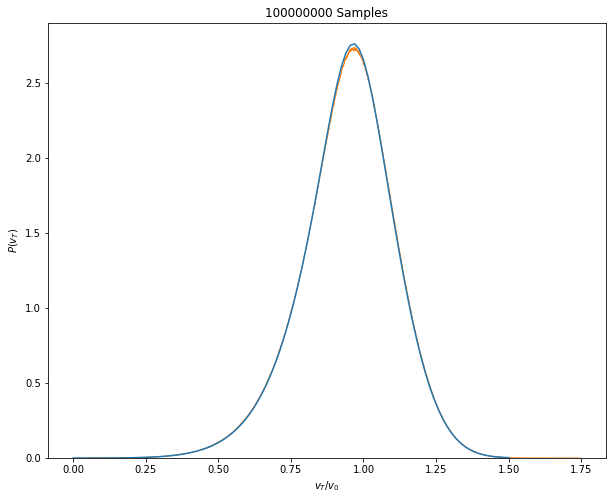

In [3]:
sample_sizes = [10000, 100000, 1000000, 10000000, 100000000]
DATADIR = '/geir_data/scr/mwbub/data/qdf_samples/'
for sample_size in sample_sizes:
    data = Table.read(DATADIR + '{}_samples.fits'.format(sample_size), format='fits')
    
    plt.figure(figsize=(10,8))
    plt.hist(data['vR'], normed=True, histtype='step', bins='auto', label='$vR$')
    plt.hist(data['vz'], normed=True, histtype='step', bins='auto', label='$vz$')
    plt.hist(data['vT'], normed=True, histtype='step', bins='auto', label='$vT$')
    plt.xlabel('$v/v_0$')
    plt.ylabel('$P(v)$')
    plt.title('{} Samples'.format(sample_size))
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots(1, 2, figsize=(16,6))
    ax[0].plot(R, pRs/(np.sum(pRs) * (R[1] - R[0])))
    ax[0].hist(data['R'], normed=True, histtype='step', bins='auto')
    ax[0].set_xlabel('$R/R_0$')
    ax[0].set_ylabel('$P(R)$')
    ax[1].plot(z, pzs/(np.sum(pzs) * (z[1] - z[0])))
    ax[1].hist(data['z'], normed=True, histtype='step', bins='auto')
    ax[1].set_xlabel('$z/R_0$')
    ax[1].set_ylabel('$P(z)$')
    fig.suptitle('{} Samples'.format(sample_size))
    plt.show()
    
    plt.figure(figsize=(10,8))
    plt.plot(vT, pvTs/(np.sum(pvTs) * (vT[1] - vT[0])))
    plt.hist(data['vT'], normed=True, histtype='step', bins='auto', label='$vT$')
    plt.xlabel('$v_T/v_0$')
    plt.ylabel('$P(v_T)$')
    plt.title('{} Samples'.format(sample_size))
    plt.show()